In [ ]:
思路 只搞 0.9+5 MLP和CNN? 最多尝试 0.9+7 or 0.9+8
然后 hpc1只搞0.9
先看optimizer learning rate 特别是那些曲线完全不对的

In [ ]:
hf = h5py.File('results/train_history_1d_precip_newm/gefs_mos_CNN_0.90_0_100_bestmodel.h5', 'r')
model.summary()

### modify model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ConvLSTM2D, Conv3D

def create_classifier(type = 'MLP',
                      input_shape = None,
                      dropout = None,
                      nclass = 1):
    model = Sequential()

    if type == 'MLP':
        model.add(Flatten(input_shape=input_shape))

        model.add(Dense(256, activation='relu'))
        if dropout: model.add(Dropout(dropout))

        model.add(Dense(128, activation='relu'))
        if dropout: model.add(Dropout(dropout))

        model.add(Dense(64, activation='relu'))   
        model.add(Dense(8, activation='relu'))   

        model.add(Dense(nclass, activation='sigmoid'))


    elif type == 'CNN':
        model.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Flatten())
        model.add(Dense(16, activation='relu'))
        model.add(Dense(nclass, activation='sigmoid'))


    else:
        raise ValueError('Not a valid model type.')

    return model

### train/run model

In [15]:
trial_num = 1
model = 'MLP'
q = 0.9
batch_size = 128
epochs = 200
dropout = 0.4
lead = 7

print(model, q, epochs,dropout, 'batch size', batch_size)

run_experiment(path = 'data/',
               model_type = model,
               lead = lead, # 0-13 index for 1-14 day leads
               q = q,
               batch_size = batch_size,
               epochs = epochs,
               dropout = dropout,
               verbose = 1)

MLP 0.9 200 0.4 batch size 128
before oversampling (3932, 49, 45, 1) (3932,)
class weight {0: 0.5545839210155148, 1: 0.5}
after oversampling (7090, 49, 45, 1) (7090,)
Quantile: 0.90
 lead: 7
 model: MLP
Training set: ~50.00%
Test set: ~10.51%
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2205)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               564736    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________

Epoch 23/200
53/56 [===========================>..] - ETA: 0s - loss: 0.4936 - f1_m: 0.7744
Epoch 00023: val_f1_m improved from 0.43826 to 0.44248, saving model to results/tuning\gefs_mos_MLP_0.90_7_200_bestmodel.h5
56/56 [==============================] - 1s 13ms/step - loss: 0.4932 - f1_m: 0.7758 - val_loss: 0.4141 - val_f1_m: 0.4425
Epoch 24/200
56/56 [==============================] - ETA: 0s - loss: 0.4899 - f1_m: 0.7724
Epoch 00024: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.4899 - f1_m: 0.7724 - val_loss: 0.4193 - val_f1_m: 0.4310
Epoch 25/200
52/56 [==========================>...] - ETA: 0s - loss: 0.4907 - f1_m: 0.7746
Epoch 00025: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.4923 - f1_m: 0.7741 - val_loss: 0.4212 - val_f1_m: 0.4301
Epoch 26/200
56/56 [==============================] - ETA: 0s - loss: 0.4857 - f1_m: 0.7751
Epoch 00026: val_f1_m did not improve fr

Epoch 54/200
56/56 [==============================] - ETA: 0s - loss: 0.4309 - f1_m: 0.8163
Epoch 00054: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 11ms/step - loss: 0.4309 - f1_m: 0.8163 - val_loss: 0.3922 - val_f1_m: 0.4148
Epoch 55/200
52/56 [==========================>...] - ETA: 0s - loss: 0.4275 - f1_m: 0.8119
Epoch 00055: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.4250 - f1_m: 0.8120 - val_loss: 0.3862 - val_f1_m: 0.4220
Epoch 56/200
52/56 [==========================>...] - ETA: 0s - loss: 0.4266 - f1_m: 0.8176
Epoch 00056: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.4270 - f1_m: 0.8156 - val_loss: 0.3800 - val_f1_m: 0.4268
Epoch 57/200
52/56 [==========================>...] - ETA: 0s - loss: 0.4254 - f1_m: 0.8188
Epoch 00057: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 10ms/step - loss: 

Epoch 85/200
51/56 [==========================>...] - ETA: 0s - loss: 0.3676 - f1_m: 0.8482
Epoch 00085: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.3689 - f1_m: 0.8491 - val_loss: 0.3645 - val_f1_m: 0.4226
Epoch 86/200
54/56 [===========================>..] - ETA: 0s - loss: 0.3646 - f1_m: 0.8508
Epoch 00086: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.3637 - f1_m: 0.8516 - val_loss: 0.3696 - val_f1_m: 0.4215
Epoch 87/200
53/56 [===========================>..] - ETA: 0s - loss: 0.3649 - f1_m: 0.8539
Epoch 00087: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.3656 - f1_m: 0.8528 - val_loss: 0.3699 - val_f1_m: 0.4114
Epoch 88/200
52/56 [==========================>...] - ETA: 0s - loss: 0.3608 - f1_m: 0.8538
Epoch 00088: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 

Epoch 116/200
51/56 [==========================>...] - ETA: 0s - loss: 0.3007 - f1_m: 0.8879
Epoch 00116: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.2983 - f1_m: 0.8900 - val_loss: 0.3605 - val_f1_m: 0.3970
Epoch 117/200
55/56 [============================>.] - ETA: 0s - loss: 0.2956 - f1_m: 0.8902
Epoch 00117: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 13ms/step - loss: 0.2965 - f1_m: 0.8882 - val_loss: 0.3578 - val_f1_m: 0.4076
Epoch 118/200
52/56 [==========================>...] - ETA: 0s - loss: 0.2953 - f1_m: 0.8871
Epoch 00118: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - loss: 0.2958 - f1_m: 0.8867 - val_loss: 0.3529 - val_f1_m: 0.4078
Epoch 119/200
52/56 [==========================>...] - ETA: 0s - loss: 0.2934 - f1_m: 0.8913
Epoch 00119: val_f1_m did not improve from 0.44248
56/56 [==============================] - 1s 12ms/step - lo

In [28]:
trial_num = 1
model = 'MLP'
q = 0.9
batch_size = 128
epochs = 300
dropout = 0.4
lead = 5

print(model, q, epochs,dropout, 'batch size', batch_size)

run_experiment(path = 'data/',
               model_type = model,
               lead = lead, # 0-13 index for 1-14 day leads
               q = q,
               batch_size = batch_size,
               epochs = epochs,
               dropout = dropout,
               verbose = 1)

MLP 0.9 300 0.4 batch size 128
before oversampling (3932, 49, 45, 1) (3932,)
class weight {0: 0.5545839210155148, 1: 0.5}
after oversampling (7090, 49, 45, 1) (7090,)
Quantile: 0.90
 lead: 5
 model: MLP
Training set: ~50.00%
Test set: ~10.51%
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 2205)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               564736    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
________

Epoch 22/300
55/56 [============================>.] - ETA: 0s - loss: 0.3964 - f1_m: 0.8312
Epoch 00022: val_f1_m did not improve from 0.48214
56/56 [==============================] - 1s 10ms/step - loss: 0.3970 - f1_m: 0.8292 - val_loss: 0.4119 - val_f1_m: 0.4805
Epoch 23/300
55/56 [============================>.] - ETA: 0s - loss: 0.3952 - f1_m: 0.8286
Epoch 00023: val_f1_m did not improve from 0.48214
56/56 [==============================] - 1s 11ms/step - loss: 0.3948 - f1_m: 0.8296 - val_loss: 0.4120 - val_f1_m: 0.4795
Epoch 24/300
52/56 [==========================>...] - ETA: 0s - loss: 0.3907 - f1_m: 0.8290
Epoch 00024: val_f1_m did not improve from 0.48214
56/56 [==============================] - 1s 9ms/step - loss: 0.3905 - f1_m: 0.8303 - val_loss: 0.4071 - val_f1_m: 0.4819
Epoch 25/300
50/56 [=========================>....] - ETA: 0s - loss: 0.3830 - f1_m: 0.8323
Epoch 00025: val_f1_m improved from 0.48214 to 0.48512, saving model to results/tuning\gefs_mos_MLP_0.90_5_300_bes

53/56 [===========================>..] - ETA: 0s - loss: 0.3229 - f1_m: 0.8623
Epoch 00051: val_f1_m did not improve from 0.49958
56/56 [==============================] - 1s 11ms/step - loss: 0.3233 - f1_m: 0.8632 - val_loss: 0.3645 - val_f1_m: 0.4993
Epoch 52/300
51/56 [==========================>...] - ETA: 0s - loss: 0.3271 - f1_m: 0.8664
Epoch 00052: val_f1_m did not improve from 0.49958
56/56 [==============================] - 1s 11ms/step - loss: 0.3292 - f1_m: 0.8638 - val_loss: 0.3712 - val_f1_m: 0.4932
Epoch 53/300
53/56 [===========================>..] - ETA: 0s - loss: 0.3212 - f1_m: 0.8706
Epoch 00053: val_f1_m did not improve from 0.49958
56/56 [==============================] - 1s 10ms/step - loss: 0.3225 - f1_m: 0.8693 - val_loss: 0.3669 - val_f1_m: 0.4960
Epoch 54/300
54/56 [===========================>..] - ETA: 0s - loss: 0.3202 - f1_m: 0.8692
Epoch 00054: val_f1_m did not improve from 0.49958
56/56 [==============================] - 1s 10ms/step - loss: 0.3192 - f1_m

55/56 [============================>.] - ETA: 0s - loss: 0.2685 - f1_m: 0.8959
Epoch 00079: val_f1_m did not improve from 0.53317
56/56 [==============================] - 1s 9ms/step - loss: 0.2684 - f1_m: 0.8961 - val_loss: 0.3389 - val_f1_m: 0.5269
Epoch 80/300
51/56 [==========================>...] - ETA: 0s - loss: 0.2664 - f1_m: 0.8953
Epoch 00080: val_f1_m did not improve from 0.53317
56/56 [==============================] - 1s 9ms/step - loss: 0.2667 - f1_m: 0.8938 - val_loss: 0.3308 - val_f1_m: 0.5320
Epoch 81/300
50/56 [=========================>....] - ETA: 0s - loss: 0.2606 - f1_m: 0.8963
Epoch 00081: val_f1_m did not improve from 0.53317
56/56 [==============================] - 1s 10ms/step - loss: 0.2634 - f1_m: 0.8933 - val_loss: 0.3331 - val_f1_m: 0.5312
Epoch 82/300
50/56 [=========================>....] - ETA: 0s - loss: 0.2605 - f1_m: 0.9009
Epoch 00082: val_f1_m improved from 0.53317 to 0.53374, saving model to results/tuning\gefs_mos_MLP_0.90_5_300_bestmodel.h5
56/5

50/56 [=========================>....] - ETA: 0s - loss: 0.2104 - f1_m: 0.9253
Epoch 00108: val_f1_m did not improve from 0.55175
56/56 [==============================] - 1s 11ms/step - loss: 0.2121 - f1_m: 0.9252 - val_loss: 0.3069 - val_f1_m: 0.5517
Epoch 109/300
54/56 [===========================>..] - ETA: 0s - loss: 0.2116 - f1_m: 0.9251
Epoch 00109: val_f1_m did not improve from 0.55175
56/56 [==============================] - 1s 10ms/step - loss: 0.2115 - f1_m: 0.9256 - val_loss: 0.3153 - val_f1_m: 0.5499
Epoch 110/300
55/56 [============================>.] - ETA: 0s - loss: 0.2087 - f1_m: 0.9241
Epoch 00110: val_f1_m improved from 0.55175 to 0.56055, saving model to results/tuning\gefs_mos_MLP_0.90_5_300_bestmodel.h5
56/56 [==============================] - 1s 12ms/step - loss: 0.2084 - f1_m: 0.9242 - val_loss: 0.3059 - val_f1_m: 0.5606
Epoch 111/300
55/56 [============================>.] - ETA: 0s - loss: 0.2098 - f1_m: 0.9281
Epoch 00111: val_f1_m improved from 0.56055 to 0.5

52/56 [==========================>...] - ETA: 0s - loss: 0.1642 - f1_m: 0.9440
Epoch 00137: val_f1_m did not improve from 0.58539
56/56 [==============================] - 1s 11ms/step - loss: 0.1614 - f1_m: 0.9463 - val_loss: 0.2931 - val_f1_m: 0.5832
Epoch 138/300
52/56 [==========================>...] - ETA: 0s - loss: 0.1666 - f1_m: 0.9472
Epoch 00138: val_f1_m did not improve from 0.58539
56/56 [==============================] - 1s 12ms/step - loss: 0.1648 - f1_m: 0.9471 - val_loss: 0.3015 - val_f1_m: 0.5758
Epoch 139/300
51/56 [==========================>...] - ETA: 0s - loss: 0.1600 - f1_m: 0.9446
Epoch 00139: val_f1_m did not improve from 0.58539
56/56 [==============================] - 1s 11ms/step - loss: 0.1598 - f1_m: 0.9455 - val_loss: 0.2939 - val_f1_m: 0.5790
Epoch 140/300
52/56 [==========================>...] - ETA: 0s - loss: 0.1616 - f1_m: 0.9480
Epoch 00140: val_f1_m did not improve from 0.58539
56/56 [==============================] - 1s 11ms/step - loss: 0.1615 - f

Epoch 166/300
54/56 [===========================>..] - ETA: 0s - loss: 0.1251 - f1_m: 0.9617
Epoch 00166: val_f1_m did not improve from 0.60625
56/56 [==============================] - 1s 10ms/step - loss: 0.1251 - f1_m: 0.9621 - val_loss: 0.3040 - val_f1_m: 0.5936
Epoch 167/300
54/56 [===========================>..] - ETA: 0s - loss: 0.1192 - f1_m: 0.9648
Epoch 00167: val_f1_m did not improve from 0.60625
56/56 [==============================] - 1s 10ms/step - loss: 0.1195 - f1_m: 0.9639 - val_loss: 0.3008 - val_f1_m: 0.5957
Epoch 168/300
52/56 [==========================>...] - ETA: 0s - loss: 0.1247 - f1_m: 0.9603
Epoch 00168: val_f1_m did not improve from 0.60625
56/56 [==============================] - 1s 10ms/step - loss: 0.1250 - f1_m: 0.9591 - val_loss: 0.2987 - val_f1_m: 0.5975
Epoch 169/300
56/56 [==============================] - ETA: 0s - loss: 0.1203 - f1_m: 0.9628
Epoch 00169: val_f1_m did not improve from 0.60625
56/56 [==============================] - 1s 10ms/step - lo

56/56 [==============================] - 1s 11ms/step - loss: 0.0937 - f1_m: 0.9718 - val_loss: 0.3184 - val_f1_m: 0.6145
Epoch 196/300
52/56 [==========================>...] - ETA: 0s - loss: 0.0893 - f1_m: 0.9731
Epoch 00196: val_f1_m did not improve from 0.61450
56/56 [==============================] - 1s 12ms/step - loss: 0.0898 - f1_m: 0.9726 - val_loss: 0.3202 - val_f1_m: 0.6105
Epoch 197/300
54/56 [===========================>..] - ETA: 0s - loss: 0.0922 - f1_m: 0.9728
Epoch 00197: val_f1_m improved from 0.61450 to 0.61485, saving model to results/tuning\gefs_mos_MLP_0.90_5_300_bestmodel.h5
56/56 [==============================] - 1s 12ms/step - loss: 0.0914 - f1_m: 0.9727 - val_loss: 0.3137 - val_f1_m: 0.6149
Epoch 198/300
56/56 [==============================] - ETA: 0s - loss: 0.0867 - f1_m: 0.9750
Epoch 00198: val_f1_m improved from 0.61485 to 0.61917, saving model to results/tuning\gefs_mos_MLP_0.90_5_300_bestmodel.h5
56/56 [==============================] - 1s 11ms/step - 

Epoch 226/300
56/56 [==============================] - ETA: 0s - loss: 0.0668 - f1_m: 0.9792
Epoch 00226: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0668 - f1_m: 0.9792 - val_loss: 0.3437 - val_f1_m: 0.5980
Epoch 227/300
50/56 [=========================>....] - ETA: 0s - loss: 0.0666 - f1_m: 0.9811
Epoch 00227: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0667 - f1_m: 0.9807 - val_loss: 0.3482 - val_f1_m: 0.6031
Epoch 228/300
56/56 [==============================] - ETA: 0s - loss: 0.0644 - f1_m: 0.9829
Epoch 00228: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0644 - f1_m: 0.9829 - val_loss: 0.3471 - val_f1_m: 0.6052
Epoch 229/300
55/56 [============================>.] - ETA: 0s - loss: 0.0655 - f1_m: 0.9825
Epoch 00229: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - lo

Epoch 257/300
53/56 [===========================>..] - ETA: 0s - loss: 0.0465 - f1_m: 0.9874
Epoch 00257: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0457 - f1_m: 0.9878 - val_loss: 0.3849 - val_f1_m: 0.5745
Epoch 258/300
52/56 [==========================>...] - ETA: 0s - loss: 0.0474 - f1_m: 0.9856
Epoch 00258: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 9ms/step - loss: 0.0467 - f1_m: 0.9860 - val_loss: 0.3816 - val_f1_m: 0.5708
Epoch 259/300
56/56 [==============================] - ETA: 0s - loss: 0.0513 - f1_m: 0.9860
Epoch 00259: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0513 - f1_m: 0.9860 - val_loss: 0.3816 - val_f1_m: 0.5669
Epoch 260/300
50/56 [=========================>....] - ETA: 0s - loss: 0.0473 - f1_m: 0.9880
Epoch 00260: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - los

Epoch 288/300
55/56 [============================>.] - ETA: 0s - loss: 0.0344 - f1_m: 0.9896
Epoch 00288: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0344 - f1_m: 0.9897 - val_loss: 0.4182 - val_f1_m: 0.5381
Epoch 289/300
51/56 [==========================>...] - ETA: 0s - loss: 0.0336 - f1_m: 0.9900
Epoch 00289: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 9ms/step - loss: 0.0335 - f1_m: 0.9901 - val_loss: 0.4231 - val_f1_m: 0.5659
Epoch 290/300
55/56 [============================>.] - ETA: 0s - loss: 0.0314 - f1_m: 0.9920
Epoch 00290: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - loss: 0.0317 - f1_m: 0.9913 - val_loss: 0.4252 - val_f1_m: 0.5637
Epoch 291/300
56/56 [==============================] - ETA: 0s - loss: 0.0313 - f1_m: 0.9914
Epoch 00291: val_f1_m did not improve from 0.61917
56/56 [==============================] - 1s 10ms/step - los

### function

In [6]:
import numpy as np
import pickle
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.optimizers import RMSprop
# from metrics import f1_m
# from models_og import create_classifier
# from models import create_classifier
from imblearn.over_sampling import RandomOverSampler

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
from tensorflow import keras

def get_class_weight(y):
#  return {0: y.sum() / y.size, 1: 1 - y.sum() / y.size}
   return {0: 0.5*y.size/(y.size-y.sum()), 1: 0.5*y.size/y.size}

    
def run_experiment(path = 'data/',
                   model_type = 'CNN',
                   lead = 1,
                   q = 0.95,
                   batch_size = 32,
                   epochs = 100,
                   dropout = None,
                   verbose = False):
    
    outfile = 'results/tuning/gefs_mos_%s_%0.2f_%d_%d' % (model_type, q, lead, epochs)
    fname = 'tensor/gefs_mos_daily_tensor_precip_center.pkl'
    
    x_train, y_train, x_test, y_test = pickle.load(open(path+fname, 'rb'))
    q_val = np.quantile(np.concatenate((y_train, y_test)), q)
    y_train = (y_train > q_val).astype(float)
    y_test = (y_test > q_val).astype(float)
      
    x_train = x_train[:,:,:,:,lead]
    x_test = x_test[:,:,:,:,lead]
    print('before oversampling', x_train.shape, y_train.shape)
    print('class weight', get_class_weight(y_train))


    # Plain Oversampling with imbleran
    ros = RandomOverSampler(random_state = 0)
    lat = x_train.shape[1]
    lon = x_train.shape[2]
    x_train, y_train = ros.fit_resample(x_train.reshape((-1, lat*lon)), y_train)
    x_train = x_train.reshape((-1, lat, lon, 1))

    print('after oversampling', x_train.shape, y_train.shape)
    # print(x_train[0,:,:,:])
    
    if model_type =='CNN':
        # create lat coord
        lat_coord = np.linspace(14,62,49)-38
        lat_coord[29:] = lat_coord[29:]-4
        lat_coord[:24] = np.round(lat_coord[:24]/max(abs(lat_coord)),2)
        lat_coord[29:] = np.round(lat_coord[29:]/max(abs(lat_coord)),2)
        lat_coord[24:29] = 0
        
        # create lon coord
        # 97 - 141
        # 263 - 219
        # 240 - 237
        lon_coord = np.linspace(219,263,45)-237
        lon_coord[22:]=lon_coord[22:]-3
        lon_coord[:18] = np.round(lon_coord[:18]/max(abs(lon_coord)),2)
        lon_coord[22:] = np.round(lon_coord[22:]/max(abs(lon_coord)),2)
        lon_coord[18:22] = 0
        lon_coord = -lon_coord
        
        # end result should be a rectangle matrix of the size 49*45
        lat_coord = np.repeat(lat_coord,45).reshape(49,45)
        lon_coord = np.transpose(np.repeat(lon_coord,49).reshape(45,49))
        
        # match size of input to cnn (3932,49,45,3)
        
        lat_stacked = np.stack([lat_coord for _ in range(x_train.shape[0])],axis=0)
        lon_stacked = np.stack([lon_coord for _ in range(x_train.shape[0])],axis=0)
        x_train = np.stack((np.squeeze(x_train), lat_stacked, lon_stacked), axis=3)
        lat_stacked = lat_stacked[0:x_test.shape[0],:,:]
        lon_stacked = lon_stacked[0:x_test.shape[0],:,:]
        x_test = np.stack((np.squeeze(x_test), lat_stacked, lon_stacked), axis=3)


    input_shape = x_train.shape[1:] # channels last
    # print(input_shape)
    
    model = create_classifier(input_shape = input_shape,
                              type = model_type,
                              dropout = dropout,
                              nclass = 1)
    
    if verbose:
      print('Quantile: %0.2f\n lead: %d\n model: %s' % (q, lead, model_type))
      print('Training set: ~%0.2f%%' % ((y_train.sum() / y_train.size) * 100))
      print('Test set: ~%0.2f%%' % ((y_test.sum() / y_test.size) * 100))
      model.summary()
        
    
    opt = keras.optimizers.Adam(learning_rate=0.00001)
    
    model.compile(loss='binary_crossentropy',
                  optimizer = opt,
#                  optimizer='Adam',#RMSprop(lr=0.0001),
                  metrics=[f1_m])
    
    # callback to save the best model seen during training
    mc = ModelCheckpoint(outfile+'_bestmodel.h5',
                          monitor='val_f1_m', mode='max', verbose=verbose, 
                          save_best_only=True)
    # patient early stopping callback
    es = EarlyStopping(monitor='val_f1_m', mode='max', 
                       verbose=verbose, patience=100)
    
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=verbose,
                        validation_data=(x_test, y_test),
#                        class_weight = get_class_weight(y_train),
                        callbacks=[mc, es])
    
    history.model = None
    history = (history.history['loss'],
               history.history['f1_m'],
               history.history['val_loss'],
               history.history['val_f1_m'])
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test F1:', score[1])
    print('Saved files:', outfile)
    pickle.dump(history, open(outfile+'_history.pkl', 'wb'))

### check model architecture

In [8]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import datetime as dt

In [9]:
#### check model before finding saliency
from tensorflow.keras.models import load_model
from vis.utils import utils

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
key = 'location_v10'
leads = 0
quantiles = 0.90
models='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 44, 64)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 44, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 43, 32)        8224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 43, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 64672)             0

In [16]:
key = 'location_v10'
m ='MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_0.90_0_100' % (key, m)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6615)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               846848    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [14]:
key = 'newm'
leads = 0
quantiles = 0.90
models='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 43, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 21, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 21, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 19, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 19, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 9, 16)        

### check loss

In [1]:
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

location_v10_CNN_0.90_0.nc


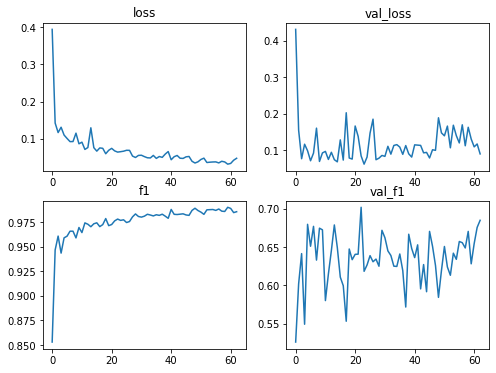

location_v10_CNN_0.90_5.nc


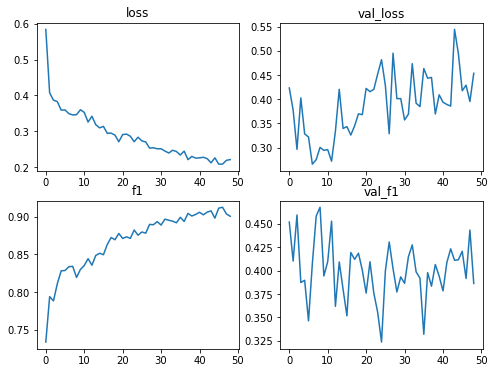

location_v10_CNN_0.90_6.nc


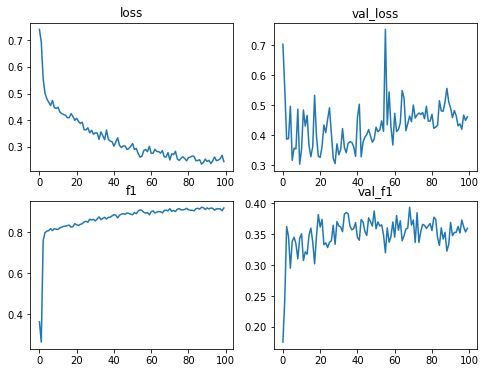

location_v10_CNN_0.90_7.nc


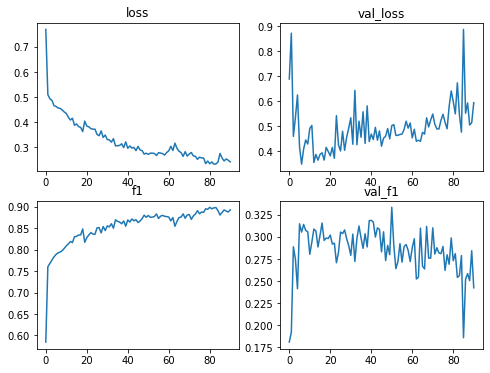

location_v10_CNN_0.90_8.nc


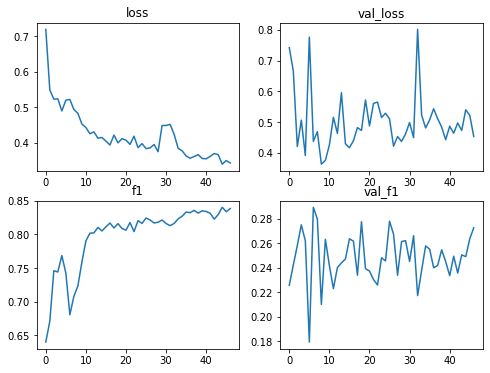

location_v10_CNN_0.90_10.nc


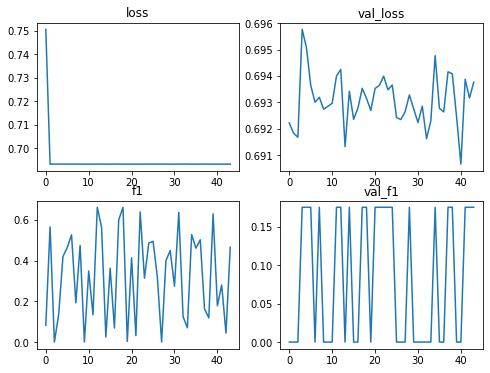

location_v10_CNN_0.90_11.nc


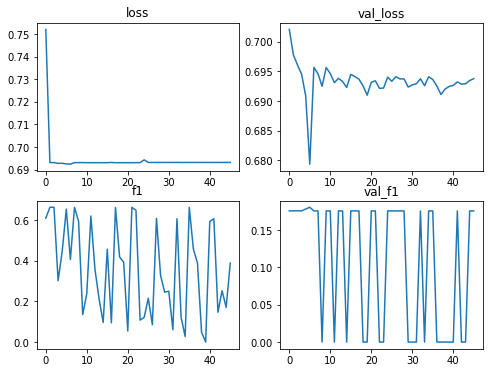

location_v10_CNN_0.90_12.nc


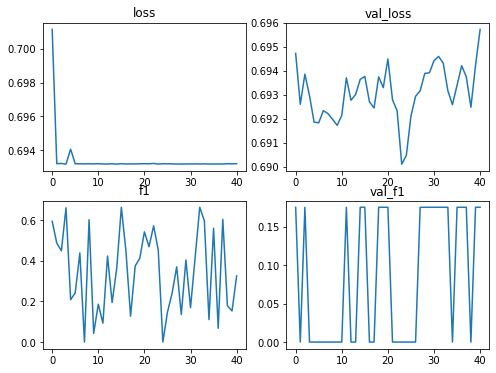

In [9]:
key = 'location_v10'
leads = [0,5, 6,7,8,10,11,12]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

location_v10_MLP_0.90_0.nc


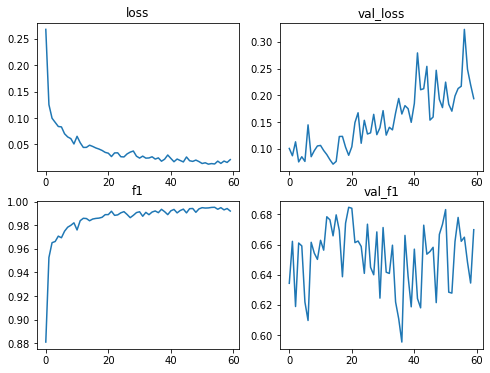

location_v10_MLP_0.90_5.nc


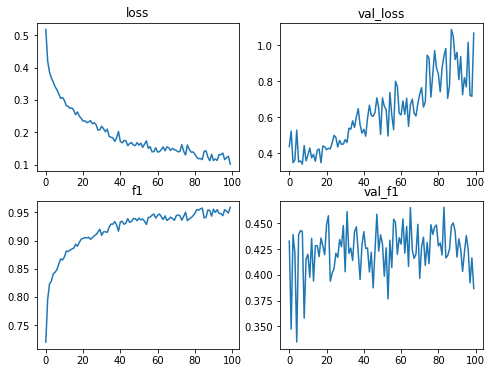

location_v10_MLP_0.90_10.nc


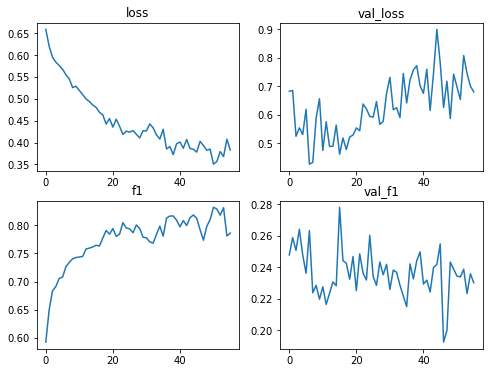

In [8]:
key = 'location_v10'
leads = [0,5,10]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['MLP']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

location_v9_CNN_0.75_0.nc


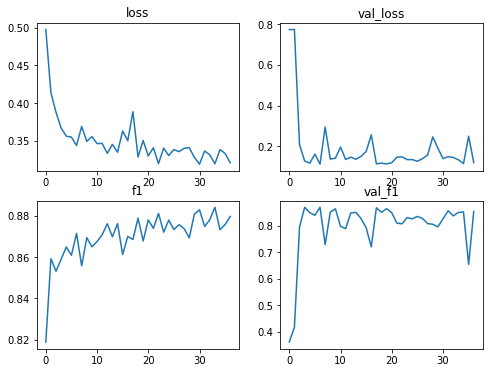

location_v9_CNN_0.75_5.nc


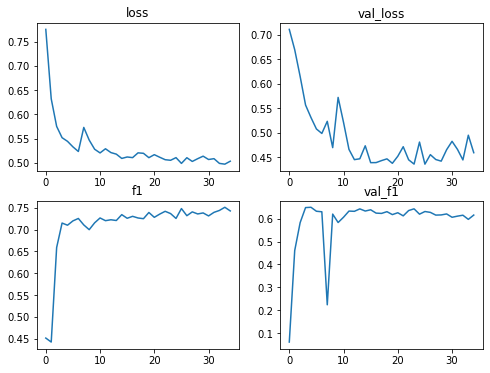

location_v9_CNN_0.75_10.nc


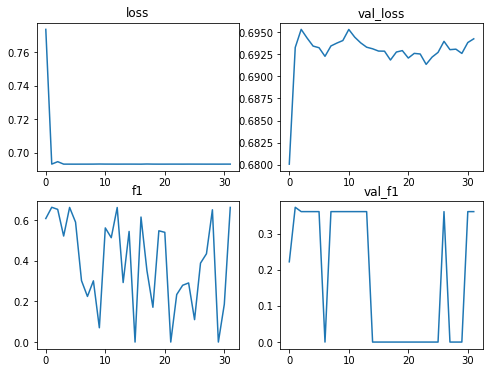

location_v9_CNN_0.90_0.nc


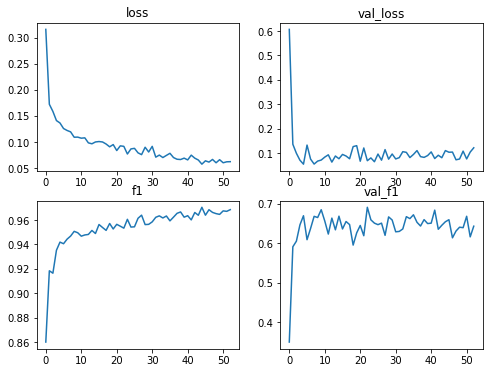

location_v9_CNN_0.90_5.nc


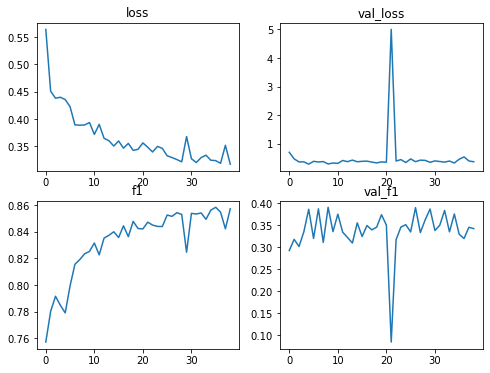

location_v9_CNN_0.90_10.nc


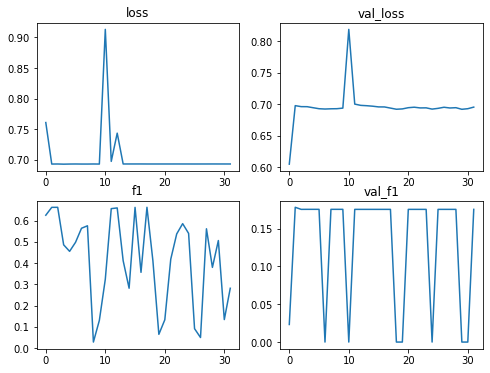

location_v9_CNN_0.95_0.nc
Not able to retrieve
location_v9_CNN_0.95_5.nc


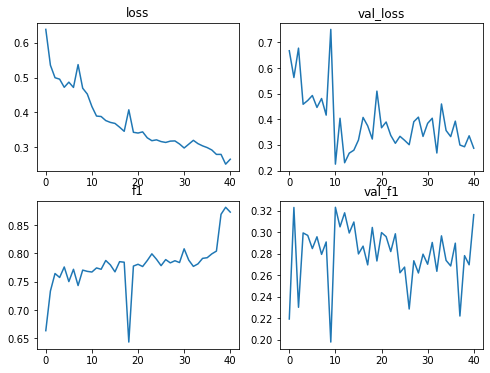

location_v9_CNN_0.95_10.nc


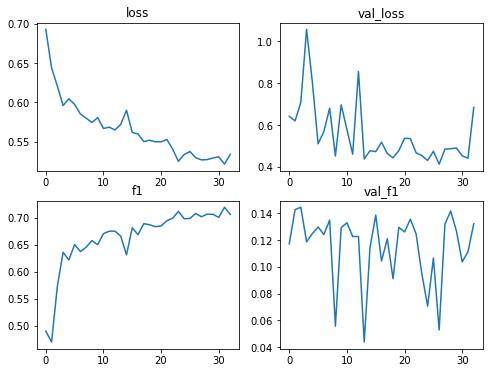

location_v9_MLP_0.75_0.nc


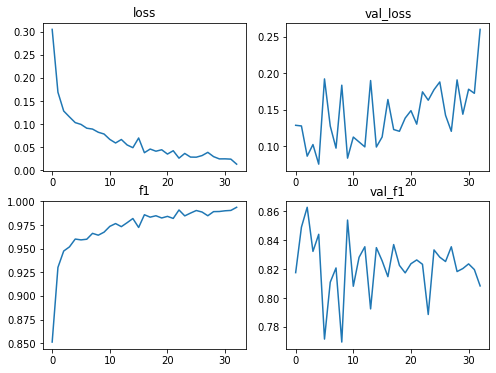

location_v9_MLP_0.75_5.nc


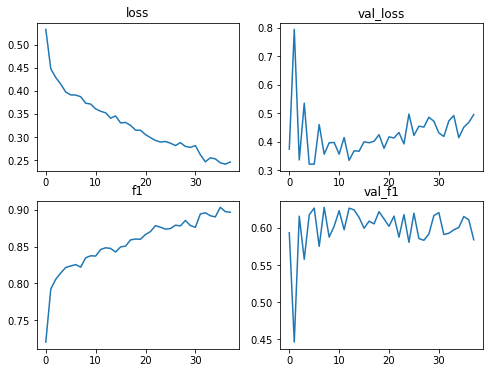

location_v9_MLP_0.75_10.nc


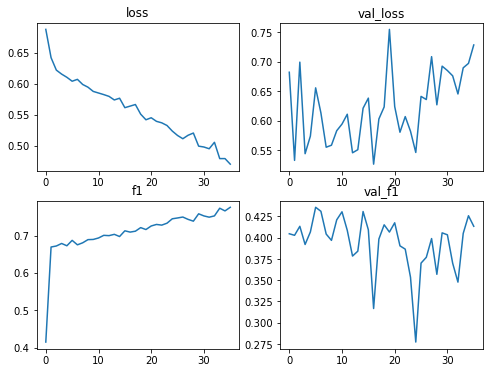

location_v9_MLP_0.90_0.nc


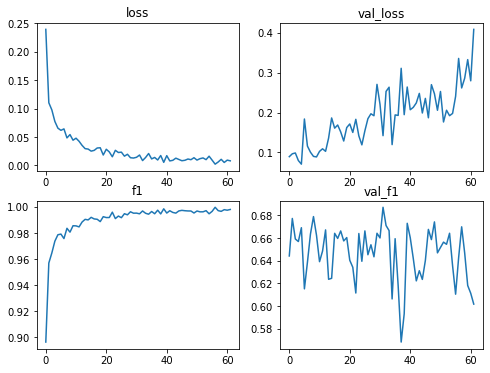

location_v9_MLP_0.90_5.nc


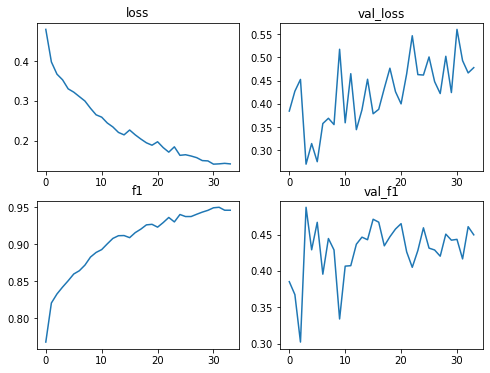

location_v9_MLP_0.90_10.nc


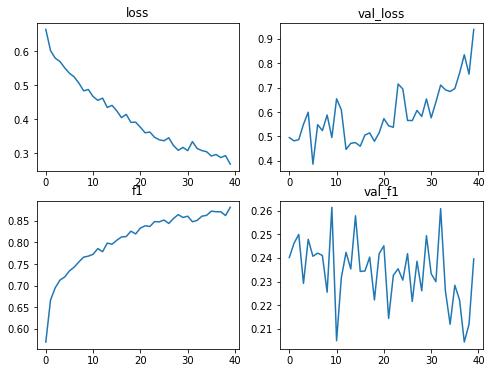

location_v9_MLP_0.95_0.nc


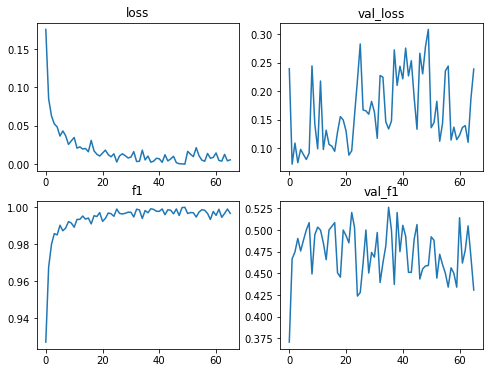

location_v9_MLP_0.95_5.nc


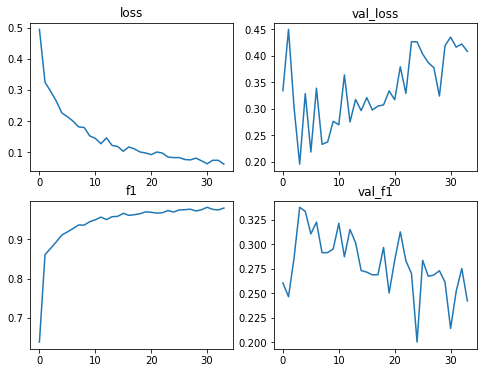

location_v9_MLP_0.95_10.nc


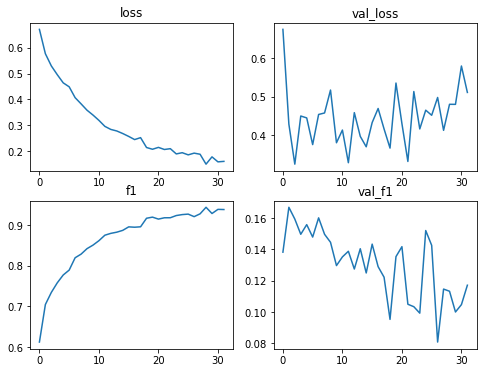

In [7]:
key = 'location_v9'
leads = [0,5,10]#[d for d in range(14)]
quantiles = [0.75, 0.90, 0.95] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN','MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            try:
                history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            except:
                print('Not able to retrieve')
                continue
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()